/tmp/ipython-input-3736084814.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start="2015-01-01", periods=n, freq="M")


<Figure size 1000x500 with 0 Axes>

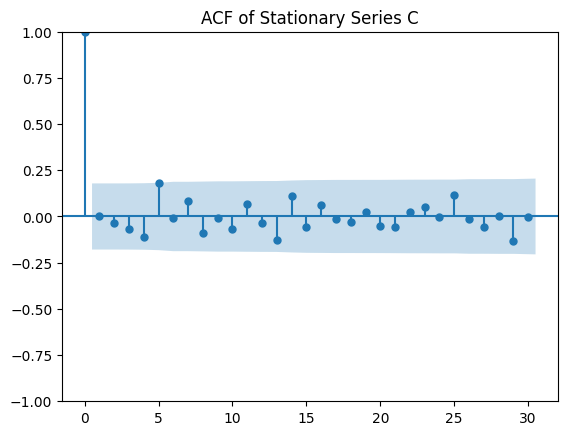


Explanation:
a. ACF of stationary data drops quickly because values are not dependent on past values.
   Each point fluctuates around a constant mean, so correlation disappears fast.

b. ACF of trending/seasonal data decays slowly because:
   - Trend creates long-term correlation (values keep increasing).
   - Seasonality repeats patterns, so correlations stay high across many lags.

ADF Test Result:
ADF Statistic: -4.5764
p-value: 0.0001
Conclusion: Series C is STATIONARY (rejects null hypothesis).

Summary:
• The ACF plot drops rapidly → confirms stationarity.
• ADF test p-value < 0.05 → statistically proves stationarity.
• Stationary data has constant mean/variance, causing correlations to vanish quickly.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
np.random.seed(42)
n = 120
dates = pd.date_range(start="2015-01-01", periods=n, freq="M")

series_C = 2 + np.random.normal(0, 2, n)

df = pd.DataFrame({"Date": dates, "Series_C": series_C}).set_index("Date")
plt.figure(figsize=(10,5))
plot_acf(df["Series_C"], lags=30)
plt.title("ACF of Stationary Series C")
plt.show()
print("\nExplanation:")
print("a. ACF of stationary data drops quickly because values are not dependent on past values.")
print("   Each point fluctuates around a constant mean, so correlation disappears fast.\n")

print("b. ACF of trending/seasonal data decays slowly because:")
print("   - Trend creates long-term correlation (values keep increasing).")
print("   - Seasonality repeats patterns, so correlations stay high across many lags.")
adf_result = adfuller(df["Series_C"])
print("\nADF Test Result:")
print(f"ADF Statistic: {adf_result[0]:.4f}")
print(f"p-value: {adf_result[1]:.4f}")

if adf_result[1] < 0.05:
    print("Conclusion: Series C is STATIONARY (rejects null hypothesis).")
else:
    print("Conclusion: Series C is NOT stationary.")
print("\nSummary:")
print("• The ACF plot drops rapidly → confirms stationarity.")
print("• ADF test p-value < 0.05 → statistically proves stationarity.")
print("• Stationary data has constant mean/variance, causing correlations to vanish quickly.")
